# PyTorch Workflow

Resources: https://www.learnpytorch.io/01_pytorch_workflow/


In [93]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [94]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1'

## 1. Data (preparing and loading)

Data can be almost anything... in maachine learning.

* Excel spreadsheet
* Images of anykind
* Videos (Youtube has a lots of data)
* Audio like songs dor podcast
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight line with known **parameters**

In [95]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Split data into training and test sets (one of most important concepts in machine learning in general)

Let's create a trainning and test set with our data

In [96]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!
"Visualize, visualize, visualize"

In [97]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

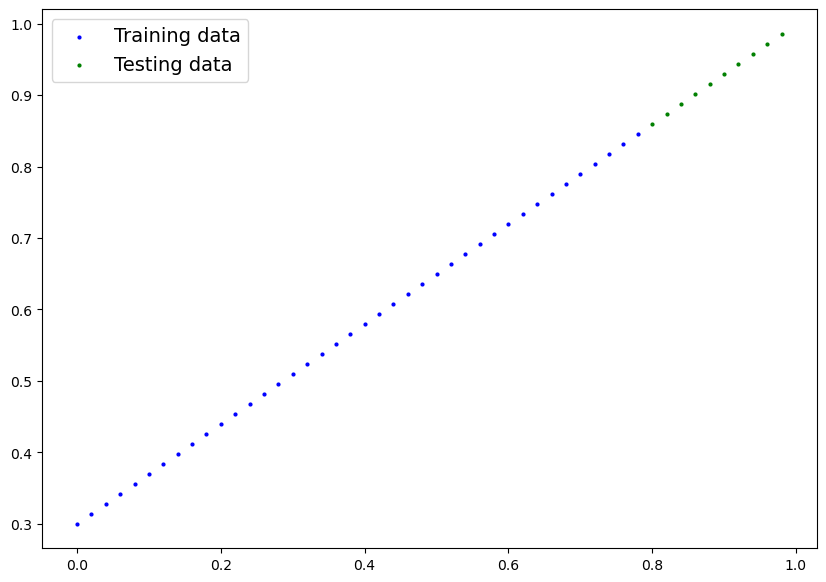

In [98]:
plot_predictions();

## 2. Build model

[ Real Python's Object Orientating programming in Python 3 guide](https://realpython.com/python3-object-oriented-programming/)

What our module does: 

* Start with random values (weigth and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

  How does it do so?

  Through two main algorithms:
  1. [Gradient descent](https://www.youtube.com/watch?v=IHZwWFHWa-w&ab_channel=3Blue1Brown)
  2. [Backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U&ab_channel=3Blue1Brown)

In [99]:
import torch
from torch import nn

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float, # <- PyTorch loves float32 by default
                                                requires_grad=True)) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float, # <- PyTorch loves float32 by default
                                            requires_grad=True)) # <- can we update this value with gradient descent?))
    
    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### PyTorch model building essentials

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  | 
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. | 
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). | 
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

### Checking the contents of our PyTorch model

Now we've created a model , let's see what's inside...
So we can check our model parameters or what's inside our model using `.parameters()` 

In [100]:
#Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [101]:
# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [102]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.
When we pass data through our model, it's going to run it through the `forward()` method.

In [103]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [104]:
# Make predictions with model
# search pytorch inference mode on twitter
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [105]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

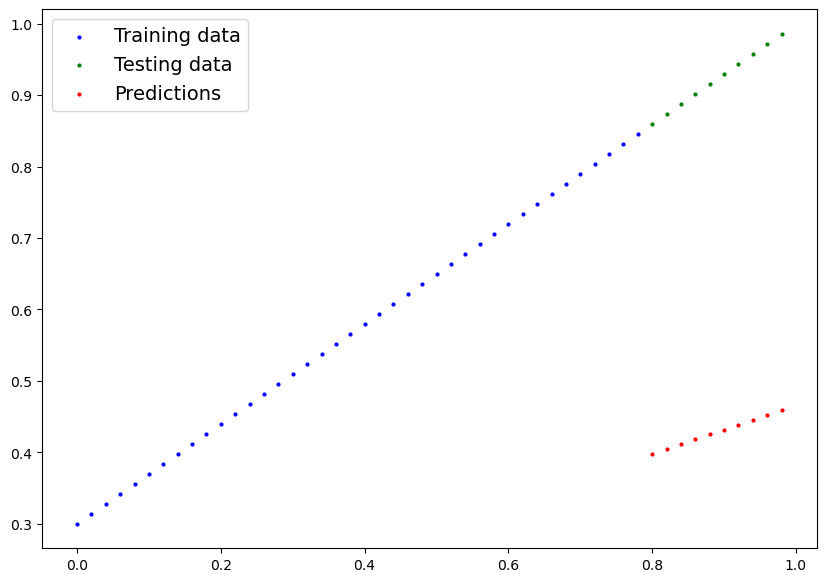

In [106]:
plot_predictions(predictions=y_preds)

## 3. Training model

the whole idea of trainin is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

Things we need to train:

* **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters(e.g. weight and bias)

And specifically for PyTorch, we need:

* A training loop
* A testing loop

In [107]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [108]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [109]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

### Creating an optimization loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involved data movin through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our mmodel with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [110]:
torch.manual_seed(42)

#An epoch is one loop through the data..

epochs = 200

epoch_count= []
loss_values = []
test_loss_values = []

### Training
#0. Loop through the data
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss 
    loss = loss_fn(y_pred, y_train) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perdorm backpropagation on the loss with respect to the parametes of the model
    loss.backward()

    #5. Step the optimmizer (perform gradient descent)
    optimizer.step() #by default how the optimizer chages will accumulate through the loop so.. we have to zero them above in step 3 for the next iteraation in the loop

    ###Testing
    model_0.eval() #turns off gradient tracking
    with torch.inference_mode(): #Turns off gradient tracking & couple more things behind
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")    
        #Print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

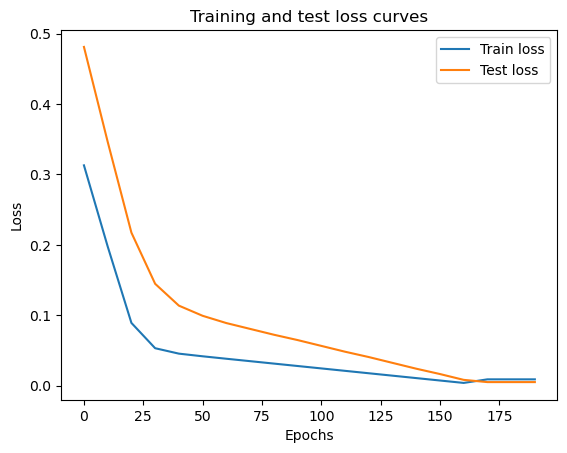

In [111]:
#Plot the loss curves
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [112]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [113]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [114]:
weight, bias

(0.7, 0.3)

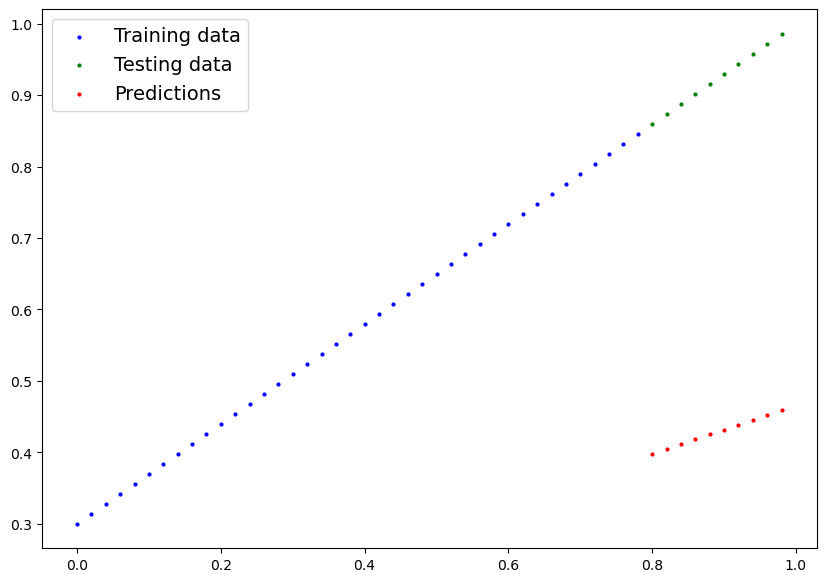

In [115]:
plot_predictions(predictions=y_preds)

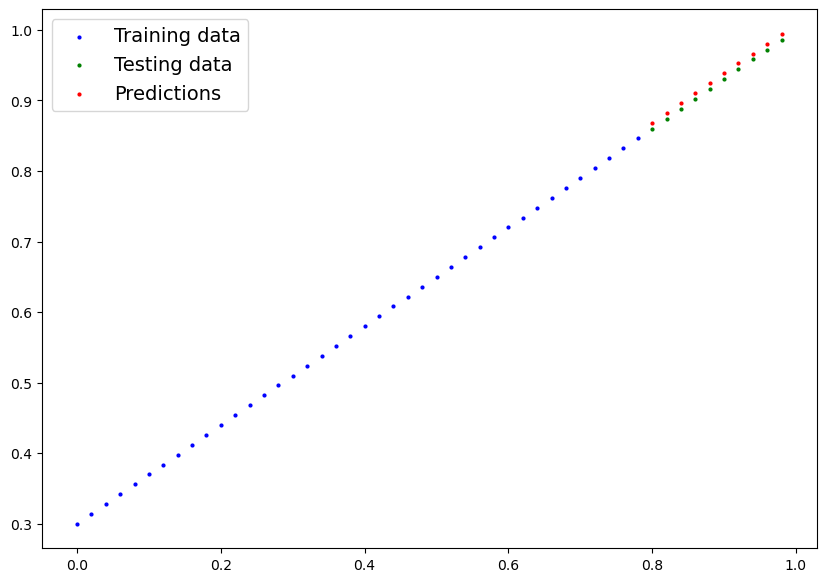

In [116]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

[Pytorch save and load code tutorial + extra curriculum](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)

In [117]:
#Saving our PyTorch model

from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "0.1_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
          f = MODEL_SAVE_PATH)

Saving model to: models\0.1_pytorch_workflow_model_0.pth


###  Loading a PyTorch model

Since we need our model's `state_dict()` rather the entire model, we'll create a new instance of our mdoel class adn load the save `state_dict()` into that.

In [118]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=True))

<All keys matched successfully>

In [119]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [120]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [121]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [122]:
#Make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [123]:
# Compare loaded model preds with original model preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place

In [124]:
# Import PyTorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.4.1'

Create device-agnostic code.

This means if we've got access to GPU out code will use it (for potentially faster computing).
If no GPU is available, the code will default to using CPU

In [125]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


6.1 Data

In [127]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

#Create X and y (features and labels)

X = torch.arange(start,end,step).unsqueeze(dim=1) #without unsqueeze qrror will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [128]:
# Split data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

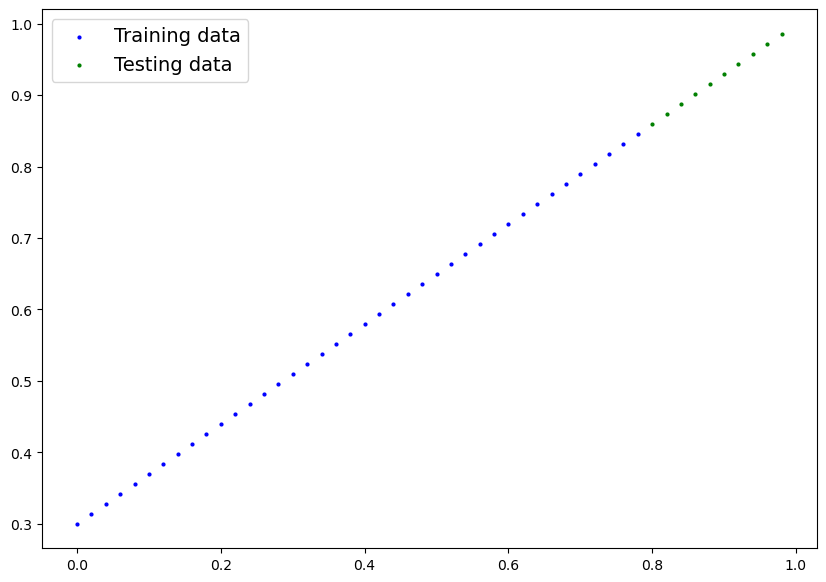

In [129]:
#Plot the data
#Note: if you don't have the plot_predictions() function loaded, this will errpr
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch linear model

In [134]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        #Use nn.Linear for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                     out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2191]])),
              ('linear_layer.bias', tensor([0.2018]))]))

In [131]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [135]:
#Check the moedl current device
next(model_1.parameters()).device

device(type='cpu')

In [136]:
# Set the model to use the  target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:

* Loss function
* Optimizer
* Training loop
* Testing loop

In [137]:
# Setup loss function
loss_fn = nn.L1Loss() #same as MAE

# Set up optimizer 
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.01)

In [150]:
#Let's write a training loop
torch.manual_seed(42)

epochs = 200

#Put data on the target device (device agnostic code)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    #Printout what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 10 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 20 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 30 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 40 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 50 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 60 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 70 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 80 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 90 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 100 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 110 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 120 | Loss: 0.003443522844463587 | Test loss: 0.007161492016166449
Epoch: 130 | Loss: 0.003443522844463587 | Test lo

In [142]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6943]])),
             ('linear_layer.bias', tensor([0.2988]))])

In [143]:
weight, bias

(0.7, 0.3)

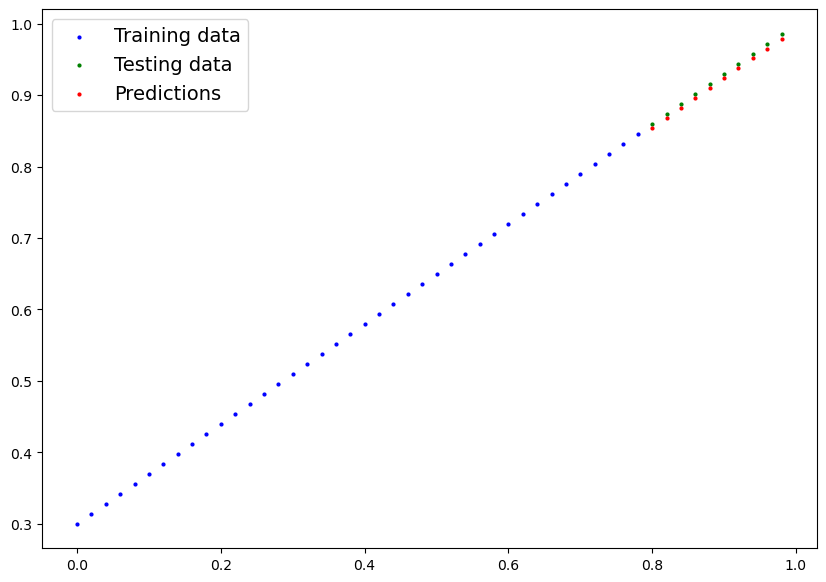

In [151]:
plot_predictions(predictions=test_pred)

### 6.4 Making and evaluating predictions

In [152]:
#Turn model into evaluation mode
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds


tensor([[0.8542],
        [0.8681],
        [0.8820],
        [0.8959],
        [0.9097],
        [0.9236],
        [0.9375],
        [0.9514],
        [0.9653],
        [0.9792]])

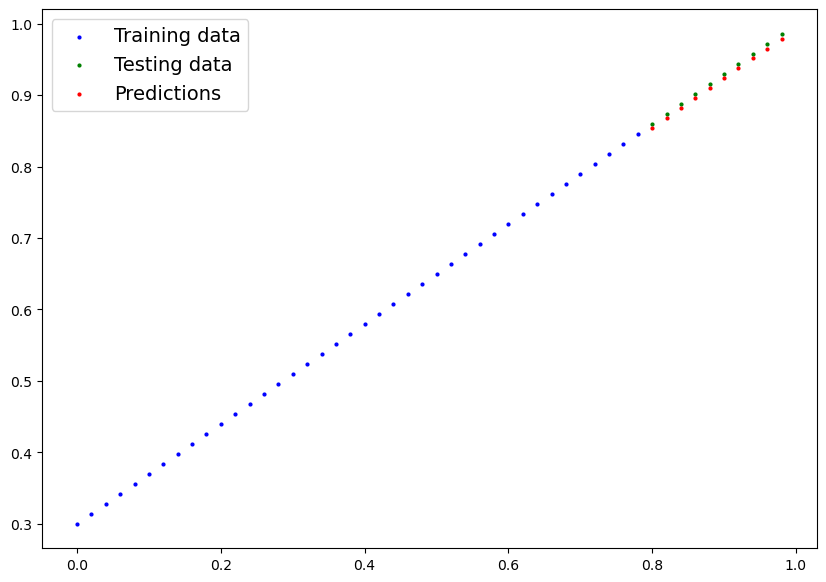

In [153]:
#Check out our model predictions visually
plot_predictions(predictions=y_preds)

### 6.5 Saving and loading a trained model

In [158]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models\01_pytorch_workflow_model_1.pth


In [163]:
#Load a PyTorch 

#Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

#Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH,weights_only=False))

#Put the loaded model to device

loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [164]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [165]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6943]])),
             ('linear_layer.bias', tensor([0.2988]))])

In [167]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Exercises and Extra-curriculum

For exercise and extra-curriculum, refer to:

 